# Question 3

In [40]:
#Import required packages
import numpy as np
import matplotlib.pyplot as plt
import random

In [41]:
#seed random number generator of numpy for reproducibility
np.random.seed(21)

## Data Generation

### Mean and Covariance Matrix type
<li>In 1D, both mean and variance can be a single number.

<li>For 2D ($x$ and $y$), there will be 2 means ($\mu_x$ and $\mu_y$).
Also, Covariance matrix would be
$$Cov=\begin{bmatrix}
 \sigma_{xx}^2 & \sigma_{xy}^2 \\
 \sigma_{yx}^2 & \sigma_{yy}^2
\end{bmatrix}$$
The covariance matrix is therefore symmetric and also a positive semidefinite will help in proper sampling.

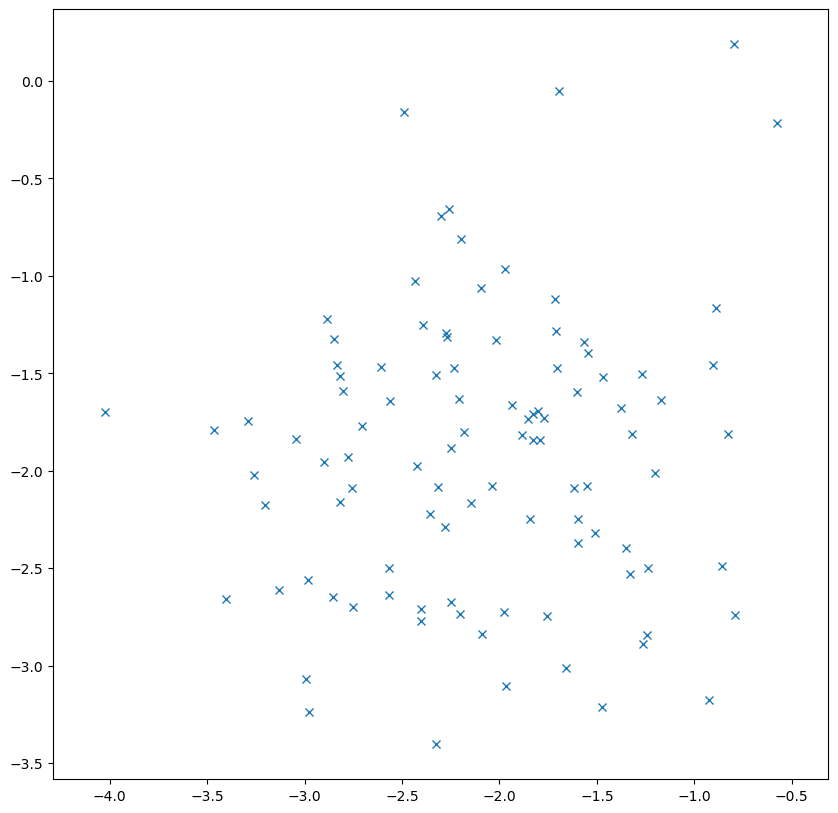

In [42]:
#Generate D_1
mean=np.array([-2,-2])
cov=np.array([
    [0.5, 0],
    [0, 0.5]
])

num_points=100
#seed random number generator of numpy for reproducibility
np.random.seed(21)
D1 = np.random.multivariate_normal(mean, cov, num_points)
x1,y1=D1.T

#Adding Label +1 
D1=np.insert(D1,D1.shape[1],int(1),axis=1)

#plotting D1
plt.figure(figsize=(10,10))
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()

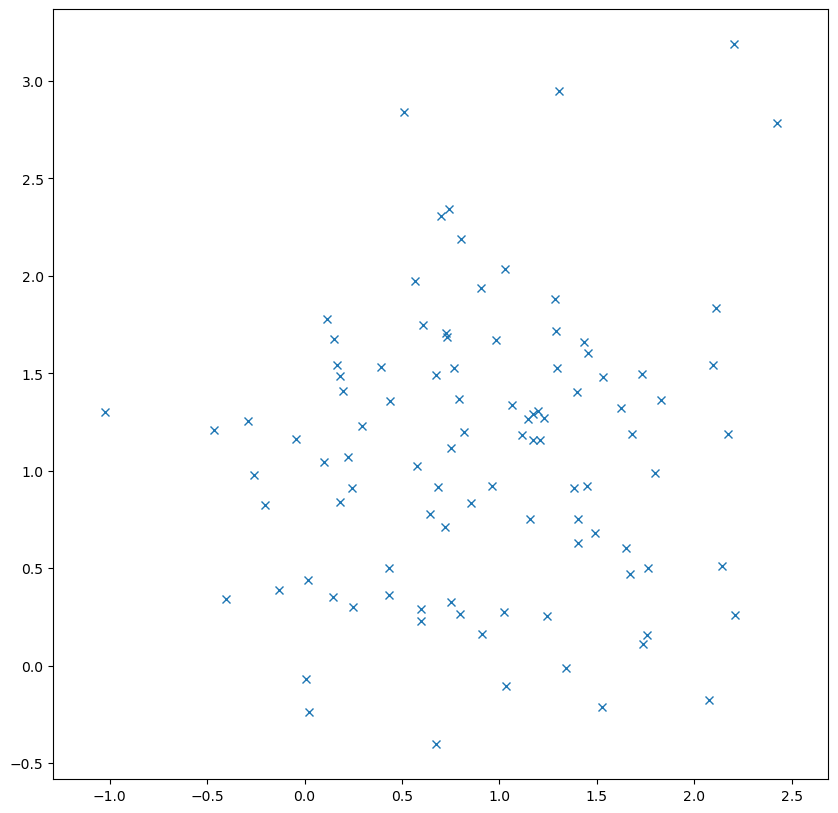

In [43]:
#Generate D_2
mean=np.array([1,1])
cov=np.array([
    [0.5, 0],
    [0, 0.5]
])

#seed random number generator of numpy for reproducibility
np.random.seed(21)
D2 = np.random.multivariate_normal(mean, cov, num_points)
x2, y2 = D2.T

#Adding Label +1 
D2=np.insert(D2,D2.shape[1],int(-1),axis=1)

plt.figure(figsize=(10,10))
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

In [44]:
#Construct D and shuffle
D=np.concatenate((D1,D2),axis=0)
np.random.shuffle(D)

## Data Visualization

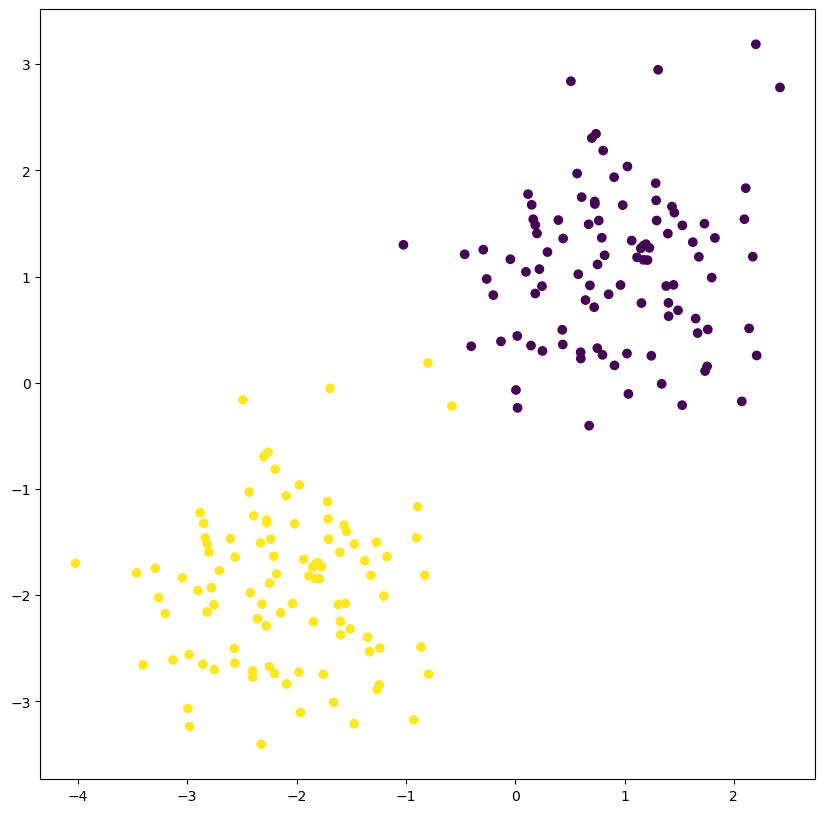

In [45]:
def plot_data(data,lineplot=False):
  #write code to plot the data points. Use different colors for different classes.
  if data.shape[1]!=3:
    raise Exception("Add label to 2D data!")
  x,y,label=data.T
  

  plt.figure(figsize=(10,10))
  plt.scatter(x, y, c=label)

  if not lineplot:
    plt.show()


plot_data(D)

# Q3: Part a

## Perceptron prediction function

In [46]:
def perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    pred=np.dot(w,x)
    if pred>=0:
      prediction = +1
    else:
      prediction = -1
    
    return prediction

## Function to update weights 

In [47]:
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    #and write code to update the weights in perceptron 
    if y_pred!=y:
      is_mistake=True
      w=w+y*x
    return w, is_mistake

## Training procedure for perceptron

In [48]:
def train_perceptron(data, ANIMATE=False):
    #Initialize weights 
    np.random.seed(21)
    w=np.random.rand(data.shape[1])
    epochs=0 #useful for executing multiple passes over a finite data set
    num_mistakes = 99 #some dummy value to get the while loop going 
    max_epochs = 100

    #storing all weights
    wAll=[]
    mistake=[]
    wAll.append(w)

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = perceptron_prediction(w, x)
            
            #retrieve the label y for x from data set D 
            y = data[i,2]
            
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
        wAll.append(w)
        mistake.append(num_mistakes)
    
    #for animation
    if ANIMATE:
      return wAll, epochs, mistake

    return w

## Plotting the separating line

In [49]:
def plot_data_with_separator(data, w, MULTIPLE_PLOT=False, LABEL=None):
  #write required code. (You can reuse the code written for plotting the data points.)
  if not MULTIPLE_PLOT:
    plot_data(data,True)
  #using two points in a line to plot
  xPoint=np.array([0,0])
  xPoint[0]=min(data[:,0])-1
  xPoint[1]=max(data[:,0])+1
  yPoint= (w[0]*xPoint+w[2])/(-w[1])
  if LABEL is None:
    plt.plot(xPoint,yPoint)
  plt.plot(xPoint,yPoint,label=LABEL)


In [50]:
w_final_0 = train_perceptron(D)    

#Calling the plot function to plot separator

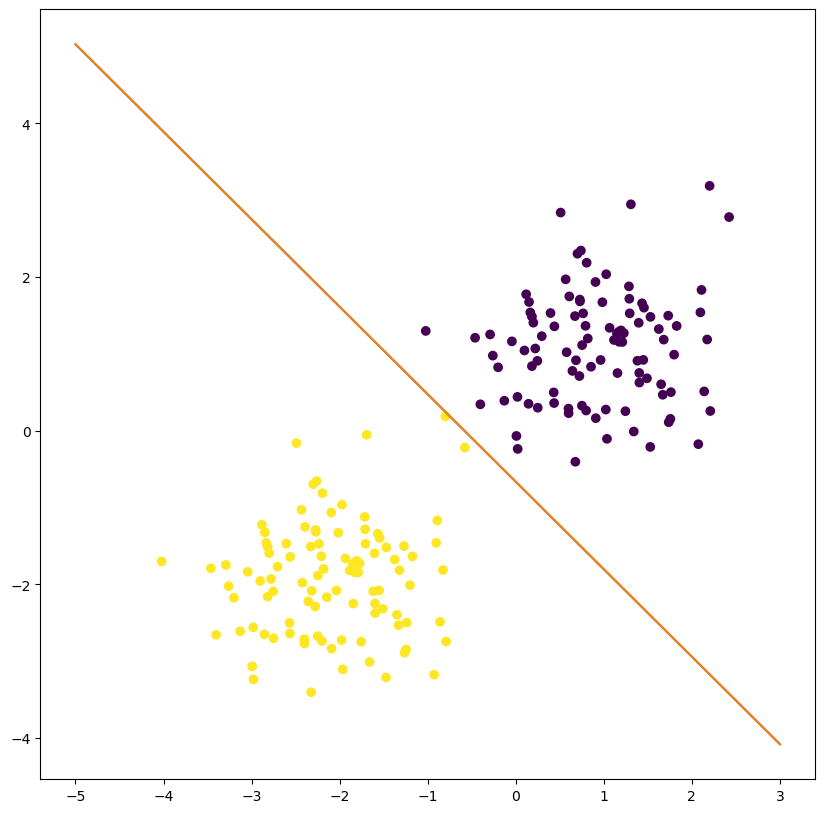

In [51]:
plot_data_with_separator(D, w_final_0)
plt.show()

##Animated Display



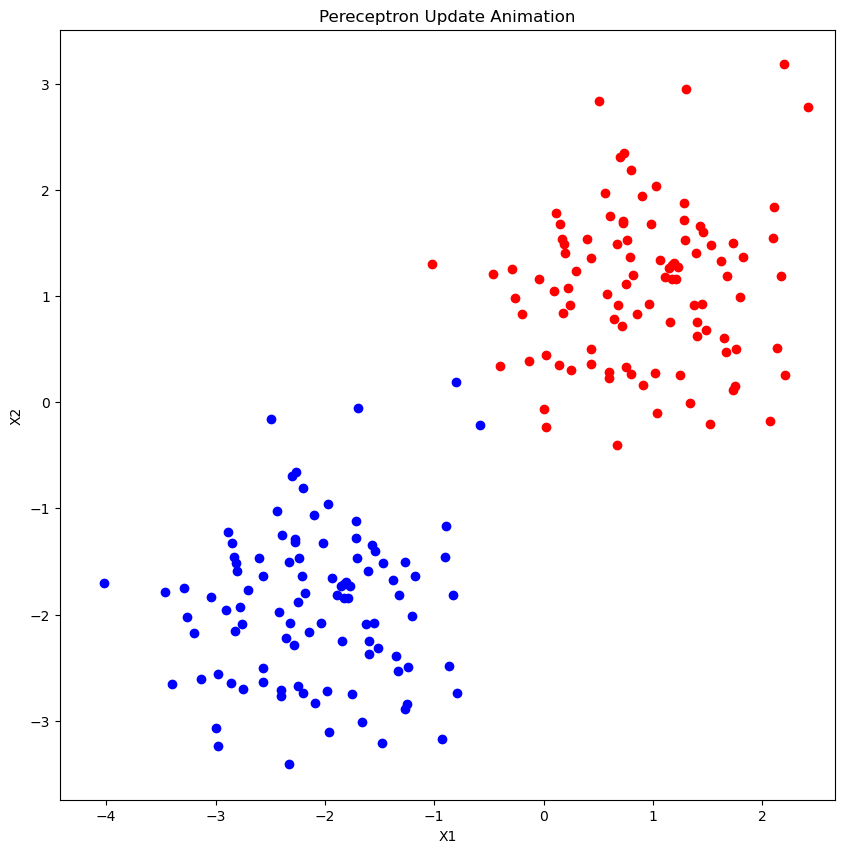

In [52]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=D
x1,y1,_=D1.T
x2,y2,_=D2.T

# create a figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)   


# set up the subplots as needed
ax1.set_xlim((1.1*min(min(x2), min(x1)), 1.1*max(max(x2), max(x1))))            
ax1.set_ylim((1.1*min(min(y2), min(y1)), 1.1*max(max(y2), max(y1))))
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')



# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Pereceptron Update Animation')
line1, = ax1.plot([], [], 'g', lw=2)     # ax.plot returns a list of 2D line objects



line2 = ax1.plot(x1,y1,'bo',x2,y2,'ro')



In [53]:
# animation function. This is called sequentially
#using two points in a line to plot
xPoint=np.array([0,0])
xPoint[0]=min(data[:,0])-1
xPoint[1]=max(data[:,0])+1

WALL_0, EPOCHS_0, MISTAKE_0=train_perceptron(data,ANIMATE=True)
def drawframe(n):
   
    w=WALL_0[n]
    yPoint= (w[0]*xPoint+w[2])/(-w[1])
    line1.set_data(xPoint, yPoint)
    txt_title.set_text('EPOCH Number {0:4d}'.format(n))
    return line1,



In [54]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=EPOCHS_0+1, interval=1000, blit=True)

In [55]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Plot Number of Mistakes

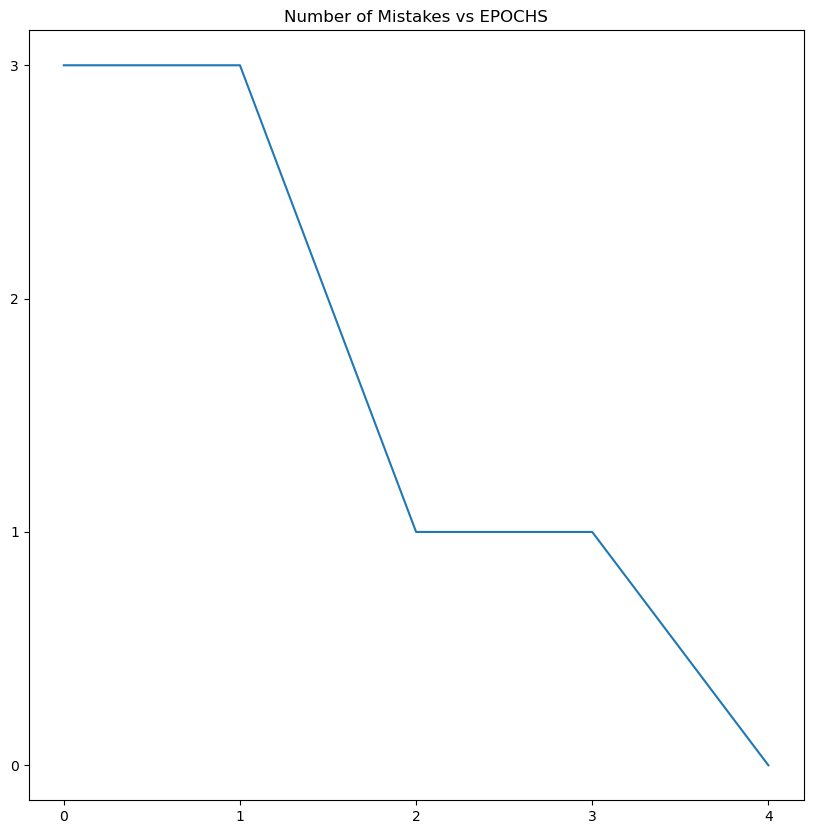

In [56]:
import math 
yint = range(min(MISTAKE_0), math.ceil(max(MISTAKE_0))+1)



plt.figure(figsize=(10,10))
plt.plot(list(range(0,EPOCHS_0)),MISTAKE_0)

plt.yticks(yint)
plt.xticks(list(range(0,EPOCHS_0)))
plt.title("Number of Mistakes vs EPOCHS")
plt.show()

# Q3: Part b

In [57]:
def sigmoid(a):
  numerator=2*a
  denominator=np.abs(2*a)+1
  return numerator/denominator

def sigmoid_der(a):
  h=0.0001
  return (sigmoid(a+h)-sigmoid(a-h))/(2*h)



In [58]:
def T_perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    pred=sigmoid(np.dot(w,x))
    if pred>=0:
      prediction = +1
    else:
      prediction = -1
    
    return prediction

In [59]:
def T_perceptron_update_weights(w, x, y, y_pred,eta):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    #and write code to update the weights in perceptron 
    if y_pred!=y:
      is_mistake=True
      w=w+eta*(y-sigmoid(np.dot(w,x)))*(sigmoid_der(np.dot(w,x)))*x
    return w, is_mistake

In [60]:
def train_T_perceptron(data, eta=0.01,ANIMATE=False):
    #Initialize weights 
    np.random.seed(21)
    w=np.random.rand(data.shape[1])
    epochs=0 #useful for executing multiple passes over a finite data set
    num_mistakes = 99 #some dummy value to get the while loop going 
    max_epochs = 100

    #storing all weights
    wAll=[]
    mistake=[]
    wAll.append(w)

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = T_perceptron_prediction(w, x)
            
            #retrieve the label y for x from data set D 
            y = data[i,2]
            
            w, is_mistake = T_perceptron_update_weights(w, x, y, y_hat,eta)
            
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
        wAll.append(w)
        mistake.append(num_mistakes)
    
    #for animation
    if ANIMATE:
      return wAll, epochs, mistake

    return w

## Q3b: (i)

In [61]:
wAll=[]
epochs=[]
mistake=[]
w_final=[]
for eta in [0.01,0.001,0.0001]:
  w,e,m=train_T_perceptron(D,eta,True)
  wAll.append(w)
  epochs.append(e)
  mistake.append(m)
  w_final.append(w[-1])
  

In [62]:
w_final, epochs

([array([-0.3277705 , -0.3174073 , -0.07569816]),
  array([-0.30034495, -0.28169471, -0.06092983]),
  array([-0.3323462 , -0.21987902,  0.22175175])],
 [8, 61, 100])

Above result shows slow converegence for smaller $\eta$

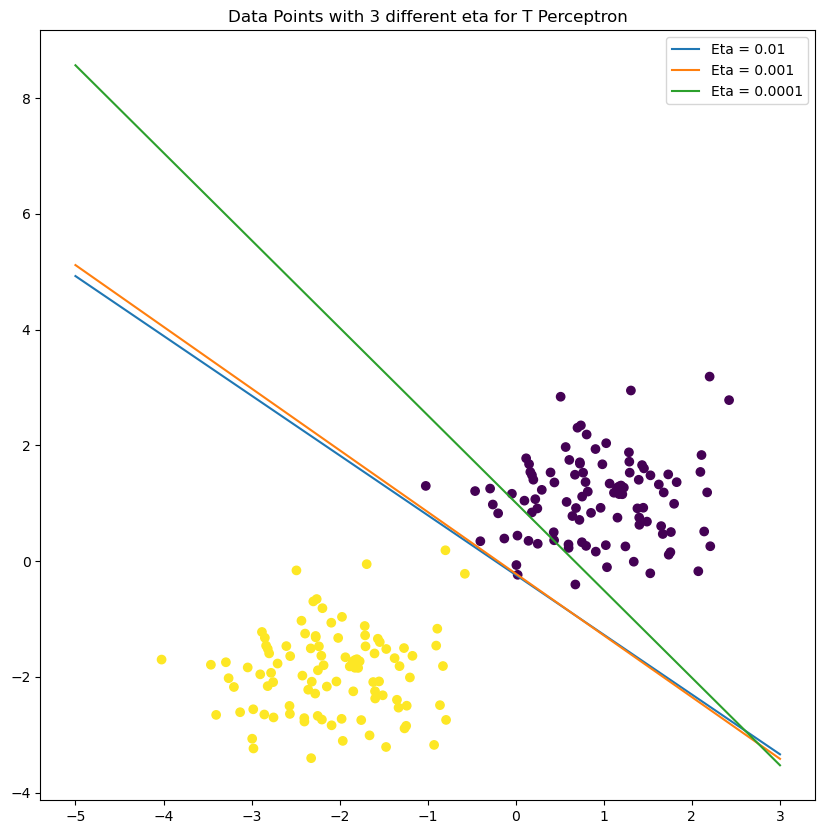

In [63]:
plot_data(D,lineplot=True)
for i,eta in enumerate([0.01,0.001,0.0001]):
  plot_data_with_separator(D, w_final[i], MULTIPLE_PLOT=True, LABEL="Eta = "+str(eta))

plt.legend()
plt.title("Data Points with 3 different eta for T Perceptron")
plt.show()


## Number of Mistakes plot

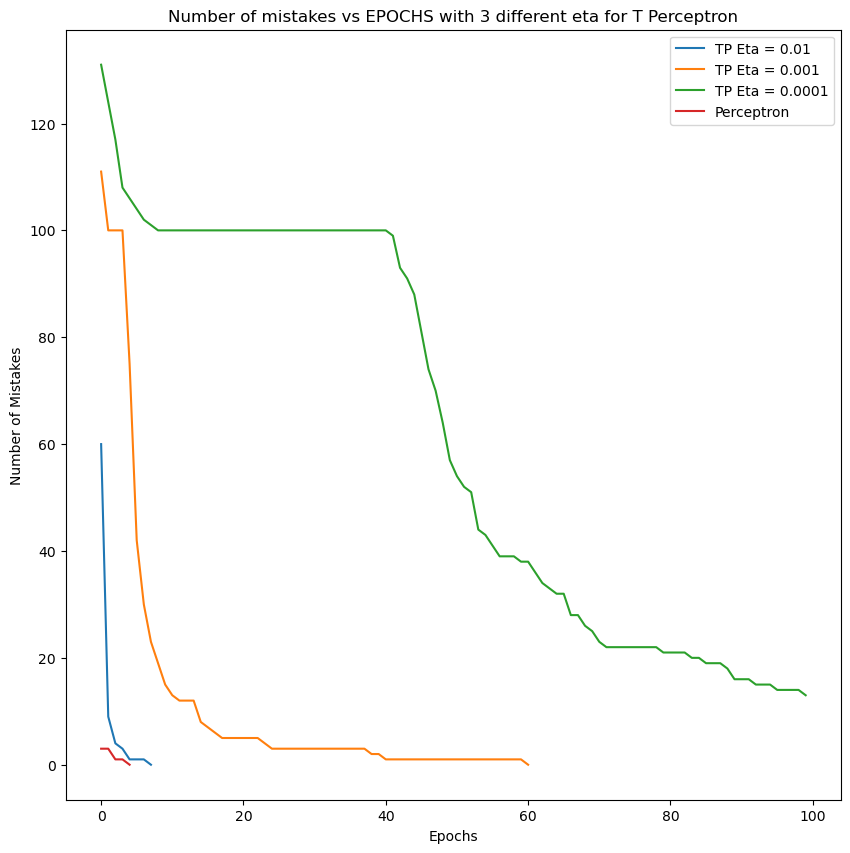

In [64]:
plt.figure(figsize=(10,10))
for i,eta in enumerate([0.01,0.001,0.0001]):
  plt.plot(list(range(0,epochs[i])),mistake[i],  label="TP Eta = "+str(eta))

plt.plot(list(range(0,EPOCHS_0)),MISTAKE_0,label="Perceptron")
#yint = list(range(min(mistake[2]), math.ceil(max(mistake[2]))+4, 10))
#plt.yticks(yint)
#plt.xticks(list(range(0,epochs[2],5)))
plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.legend()
plt.title("Number of mistakes vs EPOCHS with 3 different eta for T Perceptron")
plt.show()

### Animation for $\eta$ =0.01 

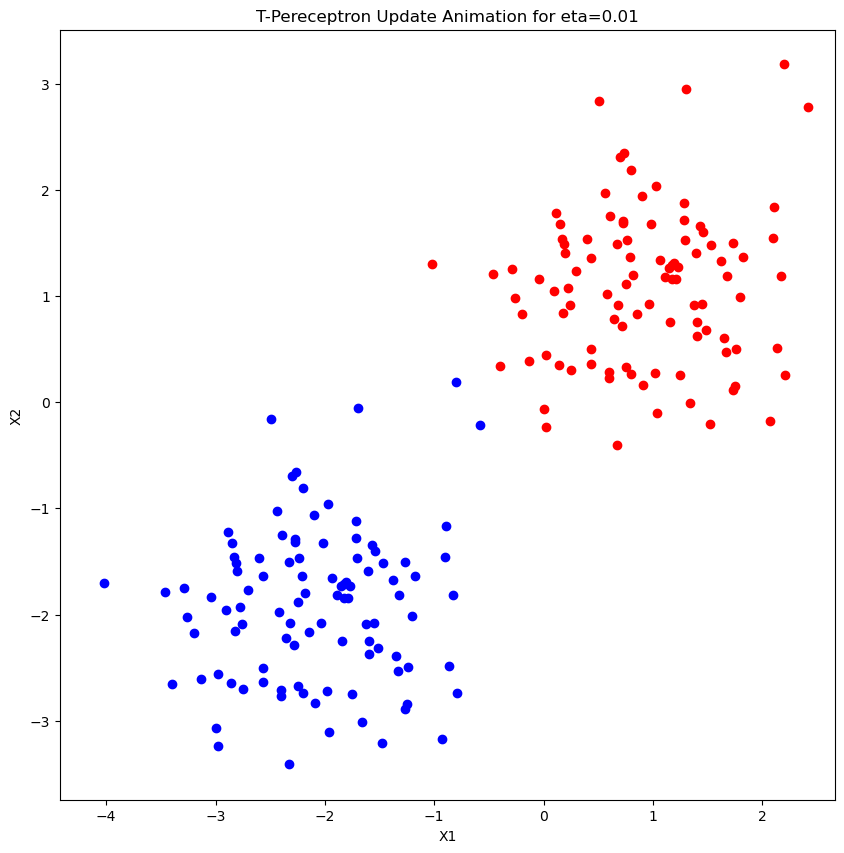

In [65]:
%matplotlib inline

data=D
x1,y1,_=D1.T
x2,y2,_=D2.T

# create a figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)   


# set up the subplots as needed
ax1.set_xlim((1.1*min(min(x2), min(x1)), 1.1*max(max(x2), max(x1))))            
ax1.set_ylim((1.1*min(min(y2), min(y1)), 1.1*max(max(y2), max(y1))))
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')



# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('T-Pereceptron Update Animation for eta=0.01')
line1, = ax1.plot([], [], 'g', lw=2)     # ax.plot returns a list of 2D line objects



line2 = ax1.plot(x1,y1,'bo',x2,y2,'ro')



In [66]:
# animation function. This is called sequentially
#using two points in a line to plot
xPoint=np.array([0,0])
xPoint[0]=min(data[:,0])-1
xPoint[1]=max(data[:,0])+1

WALL, EPOCHS, MISTAKE=train_T_perceptron(data,eta=0.01,ANIMATE=True)
def drawframe(n):
   
    w=WALL[n]
    yPoint= (w[0]*xPoint+w[2])/(-w[1])
    line1.set_data(xPoint, yPoint)
    txt_title.set_text('EPOCH Number {0:4d}'.format(n))
    return line1,



In [67]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=EPOCHS+1, interval=1000, blit=True)

In [68]:
from IPython.display import HTML
HTML(anim.to_html5_video())

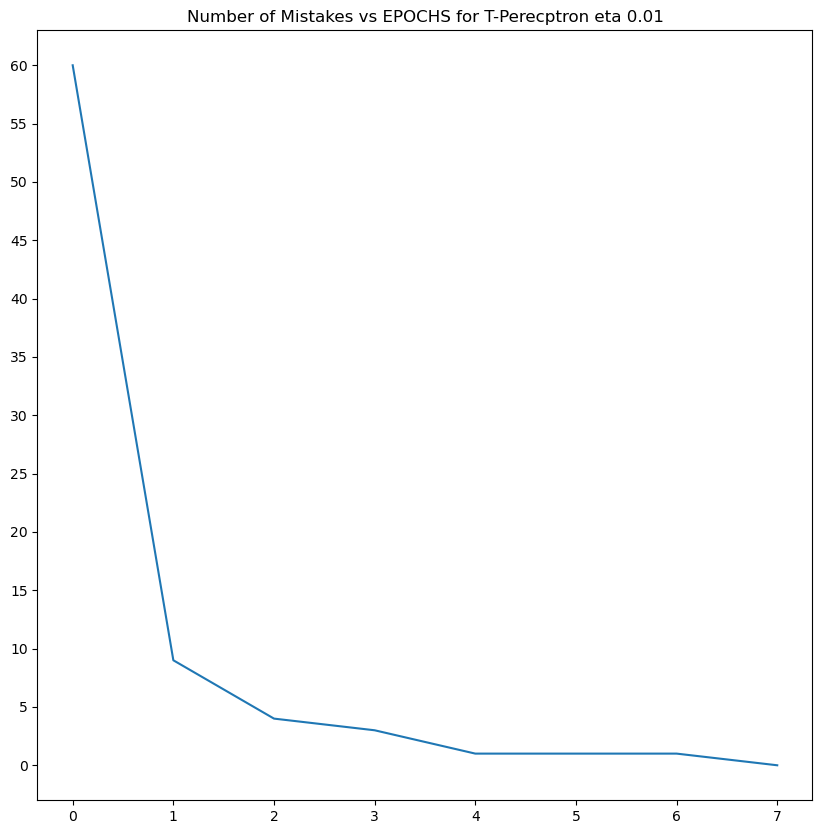

In [69]:
yint = list(range(min(MISTAKE), math.ceil(max(MISTAKE))+4, 5))
plt.figure(figsize=(10,10))
plt.plot(list(range(0,EPOCHS)),MISTAKE)

plt.yticks(yint)
plt.xticks(list(range(0,EPOCHS)))
plt.title("Number of Mistakes vs EPOCHS for T-Perecptron eta 0.01")
plt.show()

## Conclusion for Q3b. (ii)

This shows that T perceptron takes a more amount of time for convergence than the usual perceptron. Also, as eta decreases the convergence is slow.

## Q3b. Part (iii)

In [70]:
w_final

[array([-0.3277705 , -0.3174073 , -0.07569816]),
 array([-0.30034495, -0.28169471, -0.06092983]),
 array([-0.3323462 , -0.21987902,  0.22175175])]

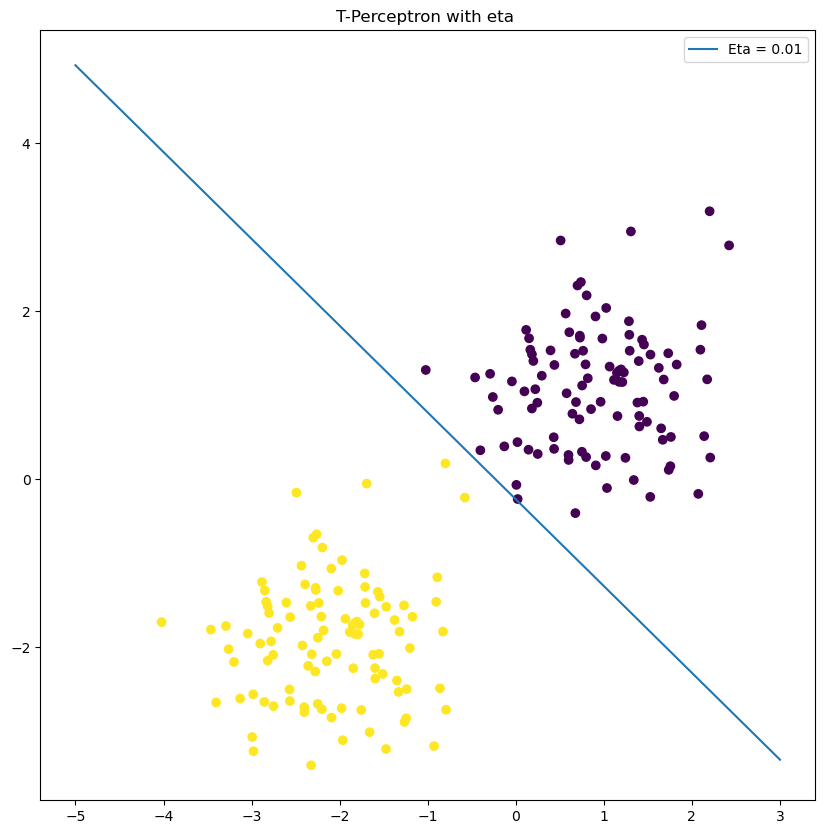

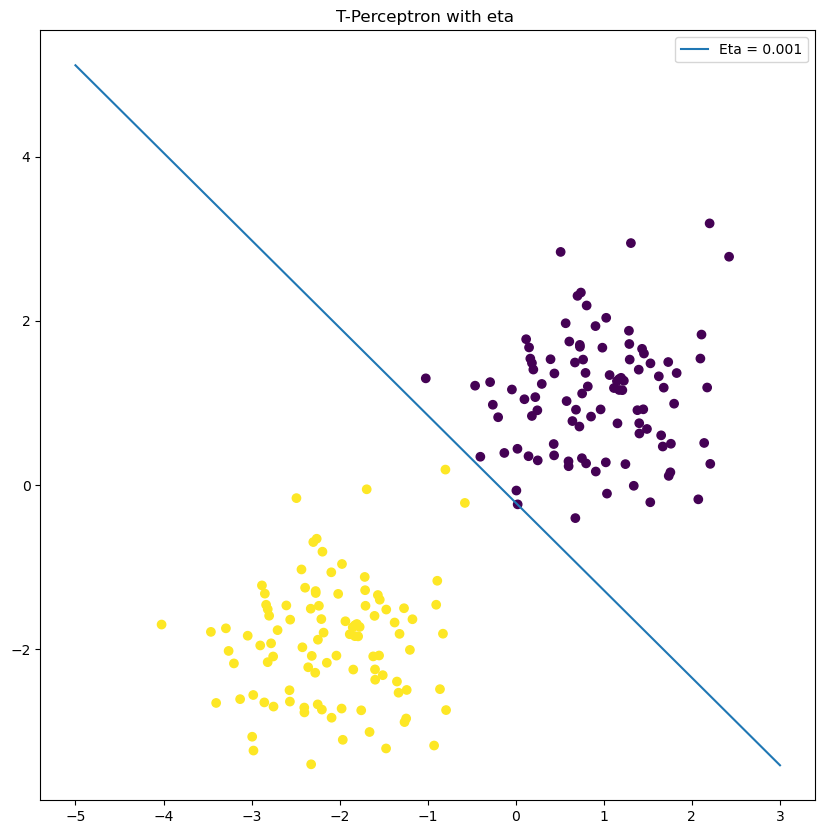

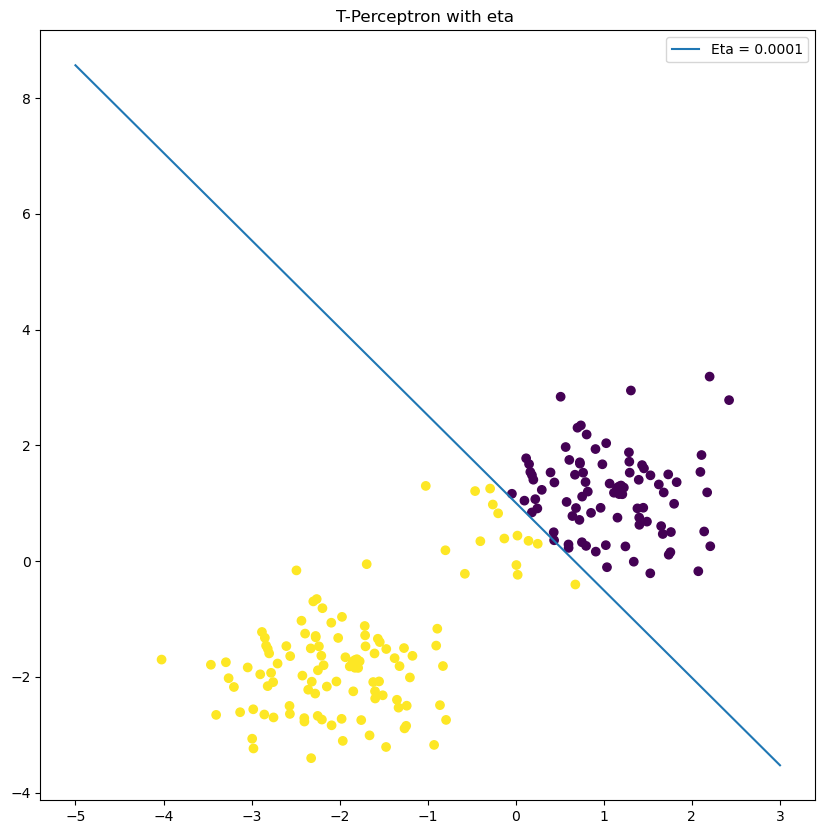

In [71]:
for w,eta in list(zip(w_final,[0.01,0.001,0.0001])):
  for i in range(len(D)):
            #retrieve the feature vector x from data set D 
            x = D[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = T_perceptron_prediction(w, x)
            #update label
            D[i,2] = y_hat
  
  plot_data_with_separator(D, w, MULTIPLE_PLOT=False, LABEL="Eta = "+str(eta))
  plt.title("T-Perceptron with eta ")
  plt.legend()
  plt.show()




# Question 3: Part C

### New Data generate

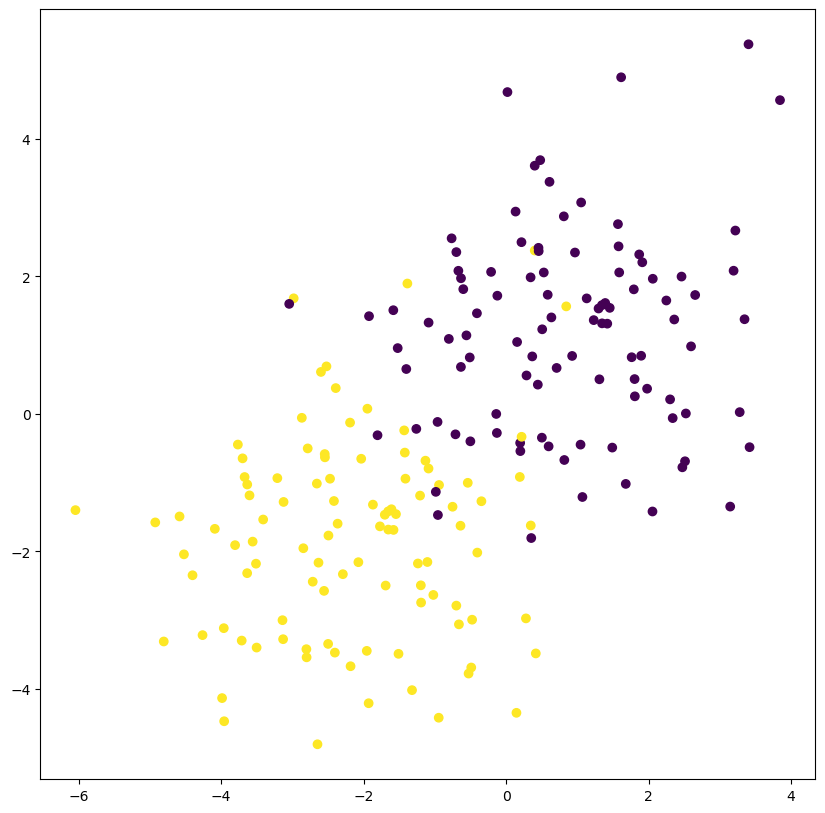

In [72]:
#Generate D_1
mean1=np.array([-2,-2])
cov=np.array([
    [2, 0],
    [0, 2]
])
num_points=100
#seed random number generator of numpy for reproducibility
np.random.seed(21)
d1 = np.random.multivariate_normal(mean1, cov, num_points)
x1,y1=d1.T
#Adding Label +1 
d1=np.insert(d1,d1.shape[1],int(1),axis=1)


mean2=np.array([1,1])
#seed random number generator of numpy for reproducibility
np.random.seed(21)
d2 = np.random.multivariate_normal(mean2, cov, num_points)
x2, y2 = d2.T
#Adding Label +1 
d2=np.insert(d2,d2.shape[1],int(-1),axis=1)

#Construct D and shuffle
D1=np.concatenate((d1,d2),axis=0)
np.random.shuffle(D1)

plot_data(D1)

D1 is linealry inseparable

## Check for Perceptron

In [73]:
WALL_1, EPOCHS_1, MISTAKE_1= train_perceptron(D1,True)
EPOCHS_1

100

In [74]:
print("Mistake in last epochs is ", MISTAKE_1[-1])

Mistake in last epochs is  20


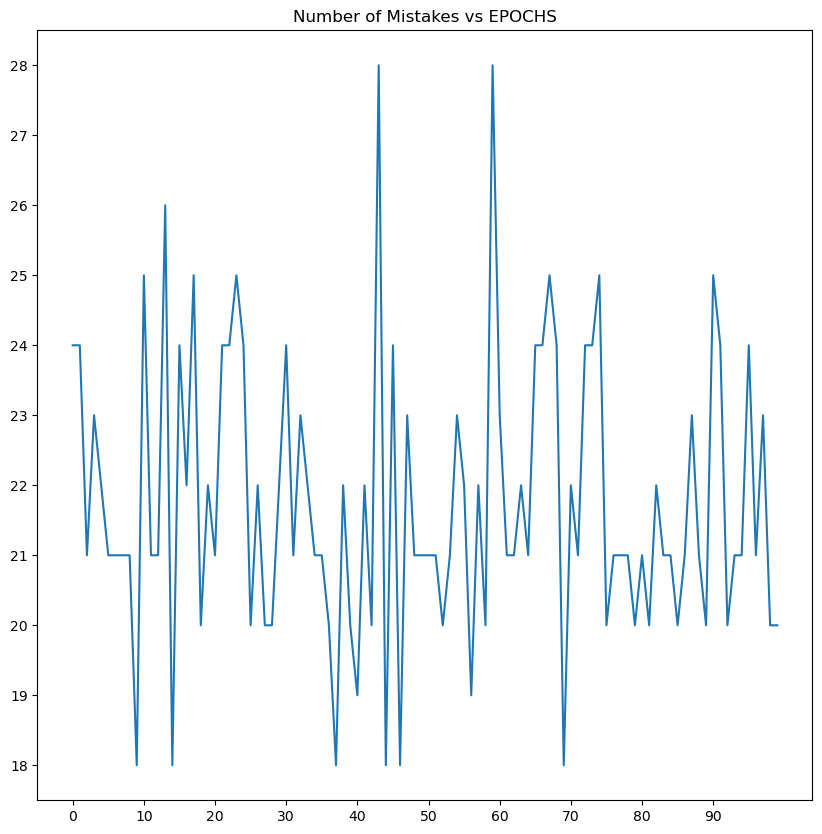

In [75]:
yint = range(min(MISTAKE_1), math.ceil(max(MISTAKE_1))+1)

plt.figure(figsize=(10,10))
plt.plot(list(range(0,EPOCHS_1)),MISTAKE_1)

plt.yticks(yint)
plt.xticks(list(range(0,EPOCHS_1,10)))
plt.title("Number of Mistakes vs EPOCHS")
plt.show()

Perceptron is performing badly

## T-Perceptron

In [76]:
wAll=[]
epochs=[]
mistake=[]
w_final=[]
for eta in [0.01,0.001,0.0001]:
  w,e,m=train_T_perceptron(D1,eta,True)
  wAll.append(w)
  epochs.append(e)
  mistake.append(m)
  w_final.append(w[-1])
  

AttributeError: Line2D.set() got an unexpected keyword argument 'LABEL'

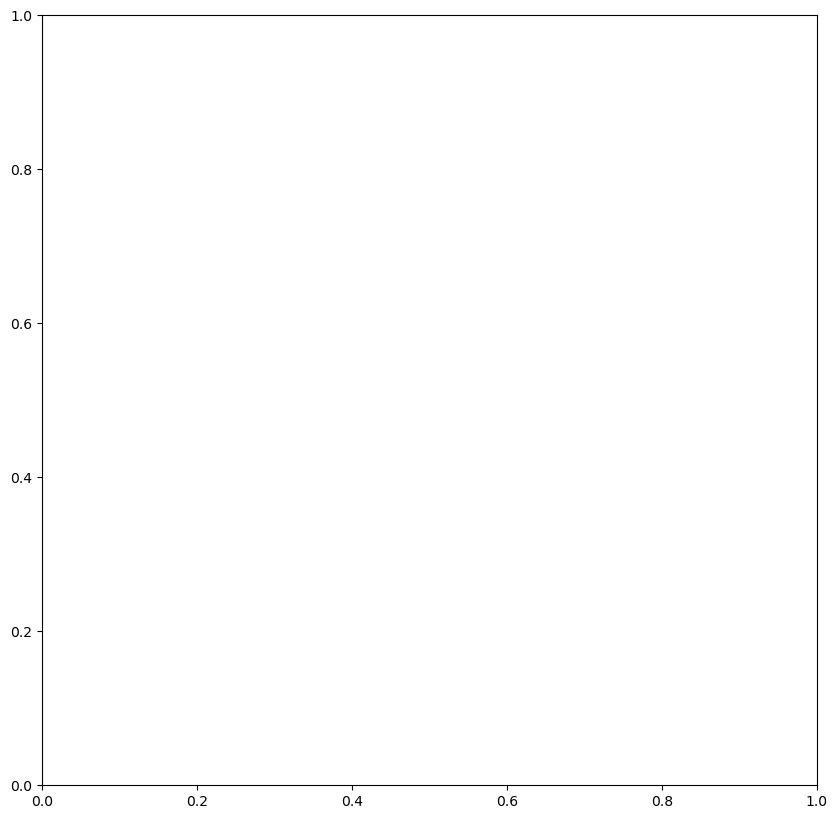

In [77]:
plt.figure(figsize=(10,10))
for i,eta in enumerate([0.01,0.001,0.0001]):
  plt.plot(list(range(0,epochs[i])),mistake[i],  LABEL="TP Eta = "+str(eta))

#yint = list(range(min(mistake[2]), math.ceil(max(mistake[2]))+4, 10))
#plt.yticks(yint)
#plt.xticks(list(range(0,epochs[2],5)))
plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.legend()
plt.title("Number of mistakes vs EPOCHS with 3 different eta for T Perceptron")
plt.show()

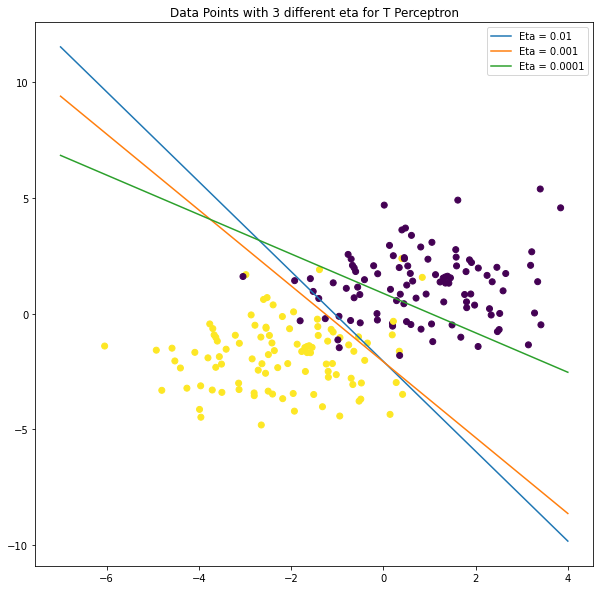

In [ ]:
plot_data(D1,lineplot=True)
for i,eta in enumerate([0.01,0.001,0.0001]):
  plot_data_with_separator(D1, w_final[i], MULTIPLE_PLOT=True, LABEL="Eta = "+str(eta))

plt.legend()
plt.title("Data Points with 3 different eta for T Perceptron")
plt.show()

## Conclusion for Q3: C

It seems from the above mistake graph that there is no fluctuation of error after initial epochs for T Perceptron. That is not the case for Perceptron. So with limited number of errors allowed, we can actually use T perceptron for linearly non-separable data.